# Tennis pre-match prediction

## Test with a first dataset generate by a postegresql database and 3 tennis statistiques sources

In [287]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

### get data

In [288]:
import pandas as pd

PATH = "dataset"
NAME = "dataset_train_final.csv"
PRED = "dataset_pred_final.csv"

def load_dataset(path=PATH, name=NAME):
    csv_path = os.path.join(path, name)
    return pd.read_csv(csv_path)

def load_predictset(path=PATH, name=PRED):
    csv_path = os.path.join(path, name)
    return pd.read_csv(csv_path)

In [289]:
dataset = load_dataset()
dataset.head()

,id,url_match_flash,url_match_atp,url_tour,name_tour_flash,name_tour_atp,name_tour_csv,round_flash,round_csv,qualif,...,return_rating_20years,first_serve_return_point_won_20years,bp_converted_20years,return_games_played_20years,service_point_won_20years,return_point_won_20years,total_point_won_20years,winner_loser_match_win,h2h,minutes_loser_winner
0,40040,https://www.flashscore.com/match/hM5Ou2TC,/en/scores/archive/nottingham/741/2016/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,1/8-finals\n,R16,False,...,-14.964524,-2.858360,-2.022296,0.454710,3.177687,-3.629932,-0.124964,2,-0.333333,-0.104860
1,40195,https://www.flashscore.com/match/C87VUjyI,/en/scores/archive/nottingham/741/2007/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,Quarter-finals\n,QF,False,...,3.504571,-1.116533,3.060714,0.572452,1.317723,-0.179112,0.810456,1,0.000000,NaN
2,40245,https://www.flashscore.com/match/vFBmzqrf,/en/scores/archive/nottingham/741/2006/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,1/16-finals\n,R32,False,...,22.130411,3.398449,7.139177,0.132143,3.299928,4.263095,3.479618,0,1.000000,-0.895000
3,40258,https://www.flashscore.com/match/4rfgNzuG,/en/scores/archive/nottingham/741/2005/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,Quarter-finals\n,QF,False,...,-37.309590,-5.512592,-9.856152,1.442251,11.429123,-7.872722,1.652120,1,0.333333,-0.333576
4,40261,https://www.flashscore.com/match/z36tQxec,/en/scores/archive/nottingham/741/2005/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,1/8-finals\n,R16,False,...,31.145862,6.209540,9.250494,-0.868953,-4.290539,7.084209,1.277690,0,1.000000,0.187869


In [290]:
predset = load_predictset()
predset.head()

,id,url_match_flash,url_match_atp,url_tour,name_tour_flash,name_tour_atp,name_tour_csv,round_flash,round_csv,qualif,...,return_rating_20years,first_serve_return_point_won_20years,bp_converted_20years,return_games_played_20years,service_point_won_20years,return_point_won_20years,total_point_won_20years,winner_loser_match_win,h2h,minutes_loser_winner
0,30022,https://www.flashscore.com/match/SKyqlq8P,/en/scores/archive/los-cabos/7480/2017/results,https://www.flashscore.com/tennis/atp-singles/...,Los Cabos,Los Cabos,Los Cabos,Final\n,F,False,...,-17.461871,-3.987370,-11.449513,0.156938,-2.595103,-1.108027,-1.874679,0,1.0,0.457731
1,30023,https://www.flashscore.com/match/IekajS7L,/en/scores/archive/los-cabos/7480/2017/results,https://www.flashscore.com/tennis/atp-singles/...,Los Cabos,Los Cabos,Los Cabos,Semi-finals\n,SF,False,...,22.390078,2.627578,7.492774,-0.752559,-9.021953,3.756551,-2.627998,0,1.0,-0.137505
2,30024,https://www.flashscore.com/match/vLlmvXxf,/en/scores/archive/los-cabos/7480/2017/results,https://www.flashscore.com/tennis/atp-singles/...,Los Cabos,Los Cabos,Los Cabos,Semi-finals\n,SF,False,...,45.209048,7.596141,15.985236,-0.785729,3.878706,6.951435,5.029259,0,1.0,-0.277641
3,30025,https://www.flashscore.com/match/ve1m9xF3,/en/scores/archive/los-cabos/7480/2017/results,https://www.flashscore.com/tennis/atp-singles/...,Los Cabos,Los Cabos,Los Cabos,Quarter-finals\n,QF,False,...,-33.188306,-4.911701,-11.974428,0.914570,7.322521,-5.316226,0.912647,1,0.0,0.169518
4,30026,https://www.flashscore.com/match/tOXMd8Pt,/en/scores/archive/los-cabos/7480/2017/results,https://www.flashscore.com/tennis/atp-singles/...,Los Cabos,Los Cabos,Los Cabos,Quarter-finals\n,QF,False,...,-14.824904,-2.666891,-2.364239,-0.142913,-7.303195,-3.406316,-5.088535,0,1.0,-0.355505


In [292]:
predset.shape

(3761, 91)

In [293]:
dataset.shape

(34148, 91)

In [294]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34148 entries, 0 to 34147
Data columns (total 91 columns):
id                                      34148 non-null int64
url_match_flash                         34148 non-null object
url_match_atp                           34148 non-null object
url_tour                                34148 non-null object
name_tour_flash                         34148 non-null object
name_tour_atp                           34148 non-null object
name_tour_csv                           34148 non-null object
round_flash                             34068 non-null object
round_csv                               34148 non-null object
qualif                                  34148 non-null bool
door                                    34148 non-null object
surface                                 34148 non-null object
prize                                   34148 non-null int64
year_atp                                34148 non-null int64
year_flash                  

Saving figure attribute_histogram_plots


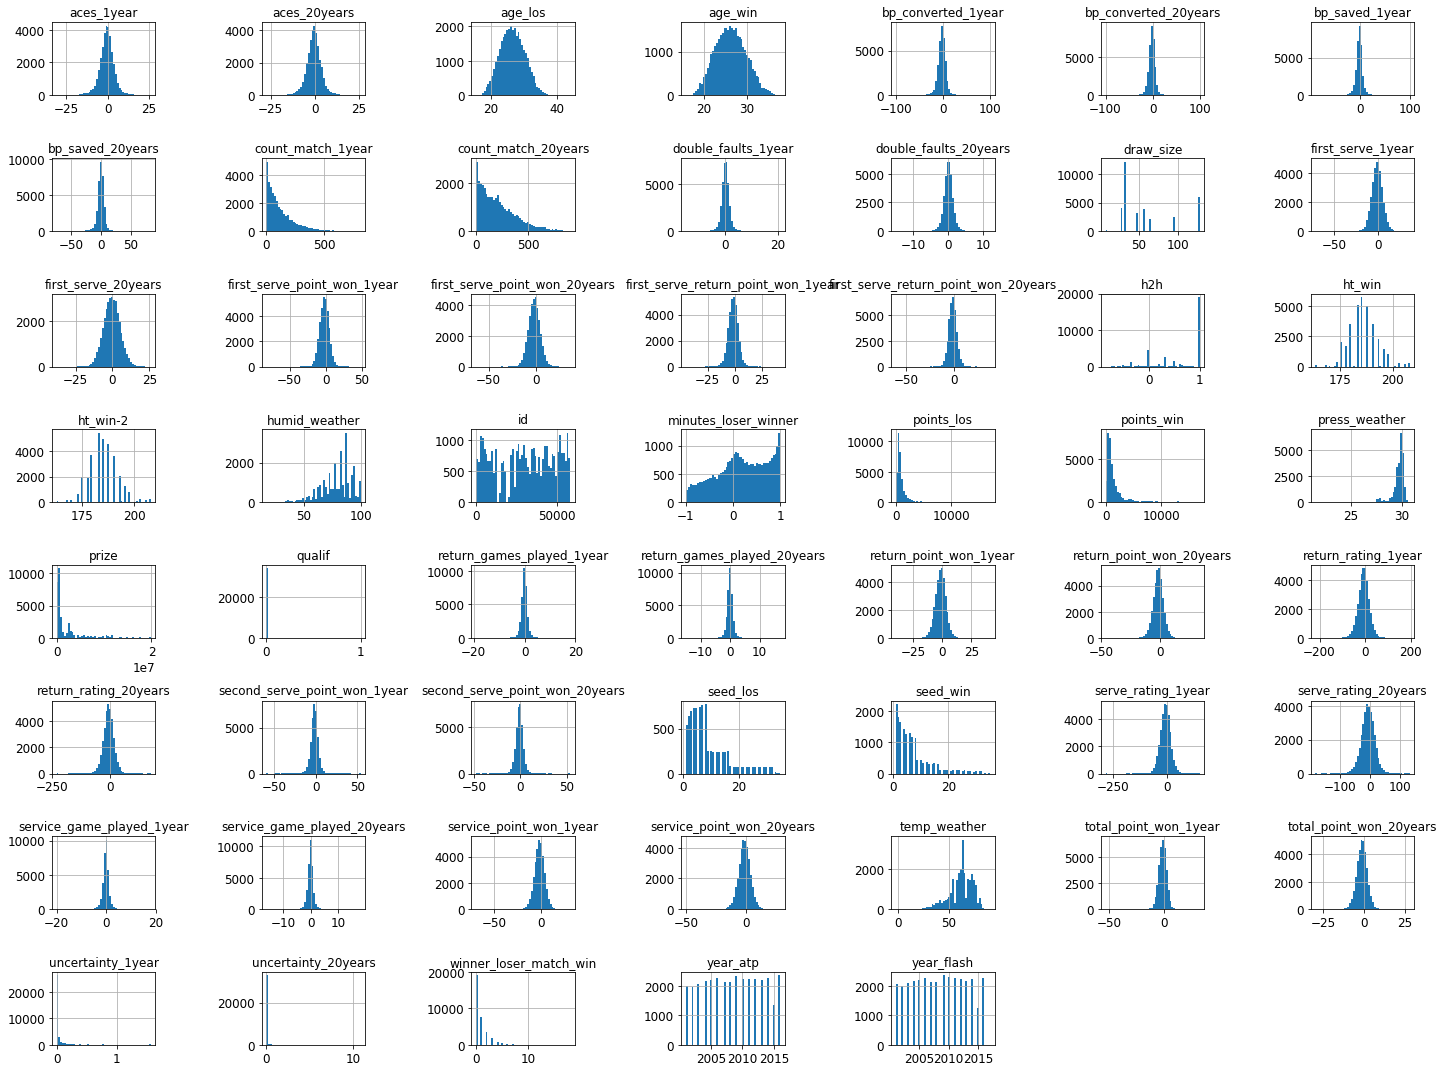

In [295]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [296]:
# to make this notebook's output identical at every run
np.random.seed(42)

### split the training set and the test set into 2 batchs with the hash id

In [297]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [298]:
train_set, test_set = split_train_test_by_id(dataset, 0.2, "id")

In [299]:
print(train_set.shape)
train_set.head()

(27148, 91)


,id,url_match_flash,url_match_atp,url_tour,name_tour_flash,name_tour_atp,name_tour_csv,round_flash,round_csv,qualif,...,return_rating_20years,first_serve_return_point_won_20years,bp_converted_20years,return_games_played_20years,service_point_won_20years,return_point_won_20years,total_point_won_20years,winner_loser_match_win,h2h,minutes_loser_winner
0,40040,https://www.flashscore.com/match/hM5Ou2TC,/en/scores/archive/nottingham/741/2016/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,1/8-finals\n,R16,False,...,-14.964524,-2.858360,-2.022296,0.454710,3.177687,-3.629932,-0.124964,2,-0.333333,-0.104860
1,40195,https://www.flashscore.com/match/C87VUjyI,/en/scores/archive/nottingham/741/2007/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,Quarter-finals\n,QF,False,...,3.504571,-1.116533,3.060714,0.572452,1.317723,-0.179112,0.810456,1,0.000000,NaN
2,40245,https://www.flashscore.com/match/vFBmzqrf,/en/scores/archive/nottingham/741/2006/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,1/16-finals\n,R32,False,...,22.130411,3.398449,7.139177,0.132143,3.299928,4.263095,3.479618,0,1.000000,-0.895000
3,40258,https://www.flashscore.com/match/4rfgNzuG,/en/scores/archive/nottingham/741/2005/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,Quarter-finals\n,QF,False,...,-37.309590,-5.512592,-9.856152,1.442251,11.429123,-7.872722,1.652120,1,0.333333,-0.333576
4,40261,https://www.flashscore.com/match/z36tQxec,/en/scores/archive/nottingham/741/2005/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,1/8-finals\n,R16,False,...,31.145862,6.209540,9.250494,-0.868953,-4.290539,7.084209,1.277690,0,1.000000,0.187869


In [300]:
print(test_set.shape)
test_set.head()

(7000, 91)


,id,url_match_flash,url_match_atp,url_tour,name_tour_flash,name_tour_atp,name_tour_csv,round_flash,round_csv,qualif,...,return_rating_20years,first_serve_return_point_won_20years,bp_converted_20years,return_games_played_20years,service_point_won_20years,return_point_won_20years,total_point_won_20years,winner_loser_match_win,h2h,minutes_loser_winner
9,40312,https://www.flashscore.com/match/2ReeHvHH,/en/scores/archive/nottingham/741/2004/results,https://www.flashscore.com/tennis/atp-singles/...,Nottingham,Nottingham,Nottingham,1/16-finals\n,R32,False,...,0.783333,0.333333,5.683333,1.100000,4.683333,-2.466667,1.883333,0,1.000000,NaN
22,41596,https://www.flashscore.com/match/vyRPCNvJ,/en/scores/archive/paris/352/2001/results,https://www.flashscore.com/tennis/atp-singles/...,Paris,ATP World Tour Masters 1000 Paris,Paris,1/16-finals\n,R32,False,...,-2.560844,-0.421850,-2.332023,-0.363784,-2.736662,-0.077111,-1.452739,2,0.500000,0.081899
29,42657,https://www.flashscore.com/match/t4UwyWJg,/en/scores/archive/rome/416/2010/results,https://www.flashscore.com/tennis/atp-singles/...,Rome,ATP World Tour Masters 1000 Rome,Rome,Quarter-finals\n,QF,False,...,-36.338072,-5.562282,-9.507064,1.945740,-3.596497,-6.271894,-4.520872,3,0.600000,NaN
30,42012,https://www.flashscore.com/match/Grg3eD1O,/en/scores/archive/rio-de-janeiro/6932/2014/re...,https://www.flashscore.com/tennis/atp-singles/...,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,1/8-finals\n,R16,False,...,-46.052692,-8.709631,-10.788813,0.452274,-8.832555,-8.892710,-8.229462,0,1.000000,0.701369
31,42199,https://www.flashscore.com/match/KjI632zU,/en/scores/archive/rome/416/2016/results,https://www.flashscore.com/tennis/atp-singles/...,Rome,ATP World Tour Masters 1000 Rome,Rome,Semi-finals\n,QF,False,...,-16.084329,-3.813139,-3.074175,0.329998,-5.356549,-3.257828,-4.025027,2,0.666667,-0.028811


In [301]:
dataset = train_set.copy()

In [302]:
dataset["draw_size"] = dataset["draw_size"].astype("object")
dataset["draw_size"].value_counts()

32     9754
128    4758
28     3155
56     3120
48     2549
96     1990
64     1737
8        74
16       11
Name: draw_size, dtype: int64

In [303]:
dataset["level_tour"].value_counts()

A    16240
M     6233
G     4590
F       85
Name: level_tour, dtype: int64

In [304]:
dataset["surface"].value_counts()

Hard      15239
Clay       8119
Grass      3231
Carpet      559
Name: surface, dtype: int64

In [305]:
dataset["door"].value_counts()

Outdoor    22498
Indoor      4650
Name: door, dtype: int64

In [306]:
dataset["round_csv"].value_counts()

R32     9529
R16     5100
R64     4937
R128    3039
QF      2552
SF      1293
F        627
RR        71
Name: round_csv, dtype: int64

In [307]:
dataset["year_atp"].value_counts()

2016    1906
2009    1826
2014    1798
2010    1792
2006    1785
2011    1774
2005    1764
2013    1745
2012    1727
2004    1727
2008    1719
2007    1705
2003    1658
2001    1590
2002    1572
2015    1060
Name: year_atp, dtype: int64

### add column that will be reverse if result is 1

In [308]:
stats_col = ["serve_rating_1year", "aces_1year", "double_faults_1year", "first_serve_1year", "first_serve_point_won_1year",
       "second_serve_point_won_1year", "bp_saved_1year", "service_game_played_1year", "return_rating_1year",
       "first_serve_return_point_won_1year", "bp_converted_1year", "return_games_played_1year", "service_point_won_1year",
       "return_point_won_1year", "total_point_won_1year", "serve_rating_20years",
       "aces_20years", "double_faults_20years", "first_serve_20years", "first_serve_point_won_20years", "second_serve_point_won_20years",
       "bp_saved_20years", "service_game_played_20years", "return_rating_20years", "first_serve_return_point_won_20years",
       "bp_converted_20years", "return_games_played_20years", "service_point_won_20years", "return_point_won_20years",
       "total_point_won_20years", "h2h", "minutes_loser_winner"]
len(stats_col)

32

### add column result that will be the y axis on the dataset for the prediction

In [309]:
dataset.shape

(27148, 91)

In [310]:
dataset.insert(dataset.shape[1], "result", np.random.randint(2, size=dataset.shape[0]))

In [311]:
dataset["result"].value_counts()

1    13585
0    13563
Name: result, dtype: int64

### transformer

In [312]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [313]:
class reverseStats(BaseEstimator, TransformerMixin):
    def __init__(self, result_col):
        self.result = result_col
        
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        ## while on each row : if result = 1 nothing else opponent each value in each collumn
        def wh(a):
            if (a[0] == 0):
                for x in np.nditer(a, op_flags=['readwrite']):
                    x[...] = -1 * x
            return a
        
        tmp = np.c_[self.result, X]
        np.apply_along_axis(wh, 0, tmp)
        tmp = np.nan_to_num(tmp)
        return tmp[:, np.arange(1, tmp.shape[1])]

In [314]:
from sklearn.pipeline import Pipeline

stats_pipeline = Pipeline([
        ("select_stats", DataFrameSelector(stats_col)),
        ("reverse", reverseStats(dataset["result"])),
    ])

stats_pipeline.fit_transform(dataset).shape

(27148, 32)

In [315]:
stats_pipeline.fit_transform(dataset)

array([[ 18.80769231,   5.98878205,   0.16826923, ...,  -0.12496368,
         -0.33333333,  -0.10485989],
       [ 13.48558559,   1.10675676,   0.15585586, ...,   0.81045611,
          0.        ,   0.        ],
       [ 18.17277266,   2.15556836,   0.10894777, ...,   3.4796176 ,
          1.        ,  -0.89499954],
       ...,
       [ 27.59803922,   9.15637255,   1.7877451 , ...,   2.10683761,
          1.        ,  -0.81311543],
       [-28.5       , -12.875     ,  -4.5       , ...,  -3.57627165,
          0.        ,   0.92956288],
       [  8.25      ,  10.        ,   1.25      , ...,  -3.75      ,
          1.        ,   0.48373102]])

In [316]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [317]:
round_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["round_csv"])),
        ("cat_encoder", CustomLabelBinarizer()),
    ])

round_pipeline.fit_transform(dataset)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [318]:
round_pipeline.fit_transform(dataset).shape

(27148, 8)

In [319]:
surface_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["surface"])),
        ("cat_encoder", CustomLabelBinarizer()),
    ])

surface_pipeline.fit_transform(dataset)

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [320]:
surface_pipeline.fit_transform(dataset).shape

(27148, 4)

In [321]:
drawSize_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["draw_size"])),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

drawSize_pipeline.fit_transform(dataset)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [322]:
drawSize_pipeline.fit_transform(dataset).shape

(27148, 9)

In [323]:
levelTour_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["level_tour"])),
        ("cat_encoder", CustomLabelBinarizer()),
    ])

levelTour_pipeline.fit_transform(dataset)

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [324]:
levelTour_pipeline.fit_transform(dataset).shape

(27148, 4)

In [325]:
from sklearn.preprocessing import Imputer

weather_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["temp_weather", "press_weather", "humid_weather"])),
        ('imputer', Imputer(strategy="mean")),
    ])

weather_pipeline.fit_transform(dataset)

array([[65.  , 29.66, 76.  ],
       [51.  , 29.45, 98.  ],
       [64.  , 29.56, 90.  ],
       ...,
       [67.  , 30.09, 87.  ],
       [83.  , 29.97, 84.  ],
       [74.  , 29.81, 91.  ]])

In [326]:
weather_pipeline.fit_transform(dataset).shape

(27148, 3)

In [327]:
from sklearn.preprocessing import Imputer

year_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["year_atp"])),
        ('imputer', Imputer(strategy="most_frequent")),
    ])

year_pipeline.fit_transform(dataset)

array([[2016.],
       [2007.],
       [2006.],
       ...,
       [2005.],
       [2016.],
       [2010.]])

In [328]:

year_pipeline.fit_transform(dataset).shape

(27148, 1)

In [329]:
door_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["door"])),
        ("cat_encoder", CustomLabelBinarizer()),
    ])

door_pipeline.fit_transform(dataset)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [330]:
door_pipeline.fit_transform(dataset).shape

(27148, 1)

In [331]:
class fillna(BaseEstimator, TransformerMixin):
    def __init__(self, val):
        self.val = val
        
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):        
        return X.fillna(self.val)

In [332]:
uncertainty_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["uncertainty_1year", "uncertainty_20years"])),
        ("cat_encoder", fillna(10)),
    ])

uncertainty_pipeline.fit_transform(dataset).shape

(27148, 2)

In [333]:
count_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["count_match_1year", "count_match_20years"])),
        ("cat_encoder", fillna(0)),
    ])

count_pipeline.fit_transform(dataset).shape

(27148, 2)

In [334]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("stats_pipeline", stats_pipeline),
        ("round_pipeline", round_pipeline),
        ("surface_pipeline", surface_pipeline),
        ("drawSize_pipeline", drawSize_pipeline),
        ("levelTour_pipeline", levelTour_pipeline),
        ("weather_pipeline", levelTour_pipeline),
        ("year_pipeline", levelTour_pipeline),
        ("door_pipeline", levelTour_pipeline),
        ("uncertainty_pipeline", levelTour_pipeline),
        ("count_pipeline", count_pipeline),
    ])

In [335]:
X_train = preprocess_pipeline.fit_transform(dataset)

In [336]:
X_train.shape

(27148, 75)

In [337]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,18.807692,5.988782,0.168269,3.903846,5.613782,-2.088141,-6.232372,1.054487,-2.774038,-2.048077,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,84.0,418.0
1,13.485586,1.106757,0.155856,-4.874775,3.931081,7.170721,-3.401351,-0.253153,9.433784,-0.440541,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,246.0
2,18.172773,2.155568,0.108948,3.634754,2.039631,2.214247,-1.923157,1.147619,22.646582,3.820084,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,135.0,142.0
3,56.979655,17.434417,0.344498,4.008408,16.203786,-4.877392,1.001920,1.164725,-34.962645,-5.448670,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,333.0,374.0
4,-20.147797,-7.007377,-0.848064,-6.478994,-3.946907,2.962617,1.337873,-0.619960,30.591522,5.916800,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,300.0,399.0


In [338]:
pd.DataFrame(X_train).isnull().any().value_counts()

False    75
dtype: int64

In [339]:
y_train = dataset["result"]

In [340]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.4990791896869245, total=   2.3s
[CV]  n_neighbors=3, weights=uniform, score=0.4988950276243094, total=   2.4s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=uniform, score=0.49511880641002026, total=   2.2s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=uniform, score=0.5077348066298343, total=   2.3s
[CV] n_neighbors=3, weights=distance .................................
[CV] ....... n_neighbors=3, weights=distance, score=0.5, to

KeyboardInterrupt: 